In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
import time
%matplotlib inline

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Input(batch_input_shape=(1,1))) # Date de intrare
model_adam.add(keras.layers.Dense(32, activation='relu'))
model_adam.add(keras.layers.Dense(16, activation='relu'))
model_adam.add(keras.layers.Dense(1, activation='linear')) # Date de iesire
model_adam.compile(loss='mse', optimizer='adam', metrics=['mse'])

model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Input(batch_input_shape=(1,1))) # Date de intrare
model_sgd.add(keras.layers.Dense(32, activation='relu'))
model_sgd.add(keras.layers.Dense(16, activation='relu'))
model_sgd.add(keras.layers.Dense(1, activation='linear')) # Date de iesire
model_sgd.compile(loss='mse', optimizer='sgd', metrics=['mse'])

def f(x):
    return 1 / (x * x + 1)

xs = np.linspace(-1, 1, 300)
ys = f(xs)

history = model_adam.fit(xs, ys, epochs=50)
history_sgd = model_sgd.fit(xs, ys, epochs=50)
print(history.params)
print(history.history.keys())

Epoch 1/50
10/10 [==============================] - 1s 5ms/step - loss: 0.5649 - mse: 0.5649
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.3880 - mse: 0.3880
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2839 - mse: 0.2839
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2023 - mse: 0.2023
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1312 - mse: 0.1312
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1097 - mse: 0.1097
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0916 - mse: 0.0916
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0787 - mse: 0.0787
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0651 - mse: 0.0651
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0541 - mse: 0.0541
Epoch 11/50
10/10 [==============================] - 0s 7ms/step - l

In [2]:
model_adam.predict([0])

array([[0.99576676]], dtype=float32)

In [3]:
print(history.history["loss"])

[0.5236514210700989, 0.3734288513660431, 0.2593490779399872, 0.1780754029750824, 0.12791724503040314, 0.10445932298898697, 0.08953063189983368, 0.07584179192781448, 0.06260083615779877, 0.051278308033943176, 0.04213440418243408, 0.033980727195739746, 0.027568941935896873, 0.022040296345949173, 0.01745554618537426, 0.01366772036999464, 0.010634653270244598, 0.007998880930244923, 0.005824102554470301, 0.0042872438207268715, 0.003075936110690236, 0.002230812795460224, 0.001640112604945898, 0.0011816833866760135, 0.0008844963740557432, 0.000684180180542171, 0.0005558475968427956, 0.00045478876563720405, 0.0003917385183740407, 0.00033915479434654117, 0.00030169938690960407, 0.00027118317666463554, 0.00023995280207600445, 0.00021543909679166973, 0.00019622572290245444, 0.0001752455427777022, 0.00016249135660473257, 0.00014453403127845377, 0.00013072119327262044, 0.000118226271297317, 0.00010653567733243108, 0.00010006936645368114, 9.182414942188188e-05, 8.217533468268812e-05, 7.3933108069468

In [4]:
epochs = [i for i in range(1, 51)]
print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


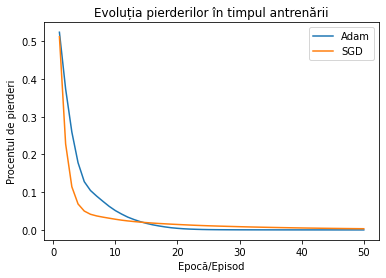

In [6]:
plt.plot(epochs, history.history["mse"], label='Adam')
plt.plot(epochs, history_sgd.history["mse"], label='SGD')
plt.xlabel('Epocă/Episod')
plt.ylabel('Procentul de pierderi')
plt.title('Evoluția pierderilor în timpul antrenării')
plt.legend()
plt.show()